**<span style="color: #808080;">In The Name of God</span>**

---

**<span style="color: #808080;">Mani hosseini</span>**<br>
**<span style="color: #808080;">SID:</span> <span style="color: #808080;">810102552</span>**<br>
**<span style="color: #808080;">Parsa Bukani</span>** <br>
**<span style="color: #808080;">SID:</span> <span style="color: #808080;">810102501</span>**<br>
**<span style="color: #808080;">Erfan Falahati</span>**<br>
**<span style="color: #808080;">SID:</span> <span style="color: #808080;">810102491</span>**

# <span style="color:rgb(143, 0, 255);">Task #1</span>
# <span style="color: #8F00FF;">Langevin Dynamics
</span>


## <span style="color: #808080;">Part 1:</span>   
### <span style="color: #8F00FF;">**Plotting the 2D Gaussian Distribution**

We are given a **2D Gaussian distribution** with:
- **Mean**: $$\mu = [-5, 5]$$
- **Covariance Matrix**: $$\Sigma = 5I = \begin{bmatrix} 5 & 0 \\ 0 & 5 \end{bmatrix}$$
 
The probability density function (PDF) is:
$$
p(x) = \frac{1}{2\pi \sqrt{|\Sigma|}} \exp\left(-\frac{1}{2} (x - \mu)^T \Sigma^{-1} (x - \mu)\right)
$$
where $$|\Sigma| = 25\:, \quad \Sigma^{-1} = \frac{1}{5} I$$


For a point x = [x_1, x_2]:
$$
(x - \mu)^T \Sigma^{-1} (x - \mu) =
\begin{bmatrix} x_1 + 5 & x_2 - 5 \end{bmatrix}
\begin{bmatrix} 0.2 & 0 \\ 0 & 0.2 \end{bmatrix}
\begin{bmatrix} x_1 + 5 \\ x_2 - 5 \end{bmatrix}
= 0.2 (x_1 + 5)^2 + 0.2 (x_2 - 5)^2
$$

Thus, substituting this into the PDF formula:  
$$
p(x) = \frac{1}{10\pi} \exp \left( -0.1 \left[ (x_1 + 5)^2 + (x_2 - 5)^2 \right] \right).
$$

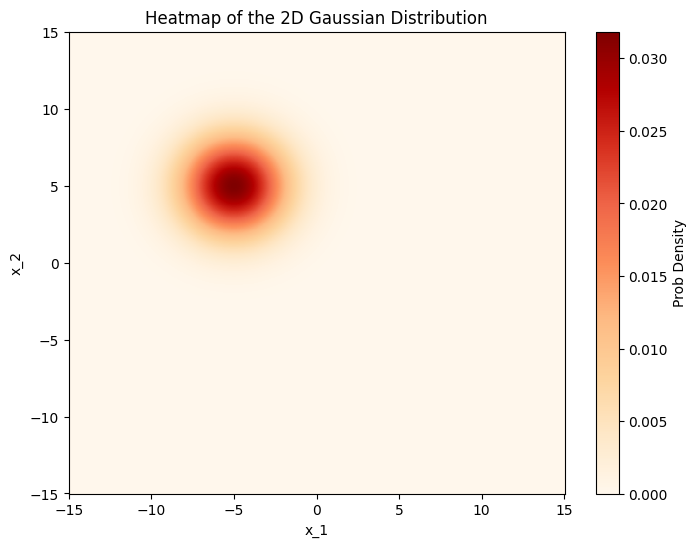

In [1]:
import numpy as np
import matplotlib.pyplot as plt


def gaussian_pdf(x1, x2):
    mu = np.array([-5, 5]) 
    norm_const = 1 / (10 * np.pi)
    diff_x1 = x1 - mu[0]  
    diff_x2 = x2 - mu[1]
    exponent = -0.1 * (diff_x1**2 + diff_x2**2)
    
    return norm_const * np.exp(exponent)


def plot_gaussian_heatmap():
    x = np.linspace(-15, 15, 1000)
    y = np.linspace(-15, 15, 1000)
    y, x = np.meshgrid(y, x)

    z = gaussian_pdf(x, y)

    fig, ax = plt.subplots(figsize=(8, 6))
    c = ax.pcolormesh(x, y, z, cmap='OrRd')
    fig.colorbar(c, ax=ax, label='Prob Density')
    ax.set_title('Heatmap of the 2D Gaussian Distribution')
    ax.set_xlabel('x_1')
    ax.set_ylabel('x_2')
    
    plt.show()

plot_gaussian_heatmap()

## <span style="color: #808080;">Part 2:</span>   
### <span style="color: #8F00FF;">**Score Function Calculation**

The **score function** is the gradient of the log probability density function (PDF):
$$
S_\theta(x) = \nabla_x \log p(x)
$$

Taking the natural logarithm of p(x):
$$
\log p(x) = -\log(2\pi \sqrt{|\Sigma|}) - \frac{1}{2} (x - \mu)^T \Sigma^{-1} (x - \mu)
$$

Since the first term is a constant, its gradient is **zero**. To differentiate:
$$
\nabla_x \log p(x) = -\frac{1}{2} \nabla_x \left( (x - \mu)^T \Sigma^{-1} (x - \mu) \right)
$$

Using the gradient identity for a quadratic form:
$$
\nabla_x (z^T A z) = 2 A z
$$

where $$ z = x - \mu\:,  \;\;  A = -\frac{1}{2} \Sigma^{-1} $$ we get:
$$
\nabla_x \log p(x) = -\Sigma^{-1} (x - \mu)
$$

Substituting the values:
$$
S_\theta(x) = -\begin{bmatrix} 0.2 & 0 \\ 0 & 0.2 \end{bmatrix} \begin{bmatrix} x_1 + 5 \\ x_2 - 5 \end{bmatrix}
= \begin{bmatrix} -0.2 (x_1 + 5) \\ -0.2 (x_2 - 5) \end{bmatrix}
$$

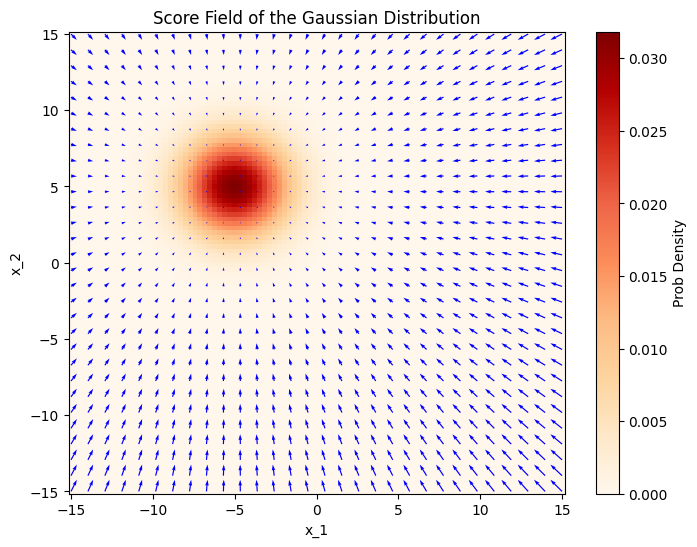

In [37]:
mean = np.array([-5, 5])
cov = np.array([[5, 0], [0, 5]])

def score_function(x, mean, cov):
    inv_cov = np.linalg.inv(cov)
    return -inv_cov @ (x - mean)

x = np.linspace(-15, 15, 100)
y = np.linspace(-15, 15, 100)
y, x = np.meshgrid(y, x)
z = gaussian_pdf(x, y)

x_quiver = np.linspace(-15, 15, 30)
y_quiver = np.linspace(-15, 15, 30)
y_quiver, x_quiver = np.meshgrid(y_quiver, x_quiver)

x1_table = np.zeros_like(x_quiver)
x2_table = np.zeros_like(y_quiver)
for i in range(len(x_quiver)):
    for j in range(len(y_quiver)):
        pos = np.array([x_quiver[j, i], y_quiver[j, i]])
        score = score_function(pos, mean, cov)
        x1_table[j, i] = score[0]
        x2_table[j, i] = score[1]

fig, ax = plt.subplots(figsize=(8, 6))
c = ax.pcolormesh(x, y, z, cmap='OrRd')
fig.colorbar(c, ax=ax, label='Prob Density')
ax.quiver(x_quiver, y_quiver, x1_table, x2_table, color='blue', scale=170)

ax.set_title("Score Field of the Gaussian Distribution")
ax.set_xlabel("x_1")
ax.set_ylabel("x_2")
plt.show()


## <span style="color: #808080;">Part 3:</span>   
### <span style="color: #8F00FF;">**Langevin Dynamics for Sampling**

To sample from this distribution, **Langevin Dynamics** follows the update rule:
$$
X^{t+1} = X^t + \epsilon S_\theta(X^t) + \sqrt{2\epsilon} Z^t
$$

In [38]:
def langevin_dynamics(initial_points, mean, cov, epsilon=0.01, num_steps=1000):
    num_points = initial_points.shape[0]
    x = initial_points.copy()
    trajectories = np.zeros((num_steps + 1, num_points, 2))
    trajectories[0] = initial_points
    
    for t in range(num_steps):
        scores = np.array([score_function(x[i], mean, cov) for i in range(num_points)])
        noise = np.random.normal(0, 1, size=(num_points, 2))
        x = x + epsilon * scores + np.sqrt(2 * epsilon) * noise
        
        trajectories[t + 1] = x
    
    return x, trajectories 

The **langevin_dynamics** function applies Langevin Dynamics to sample from a 2D Gaussian. It takes initial points, evolves them over 1000 steps using the score function and Gaussian noise, and returns the final samples and their trajectories.

We’ll plot a single sample trajectory to illustrate the progress of the Langevin Dynamics algorithm and demonstrate how it converges toward the high-probability region of the target (2D Gaussian) distribution:

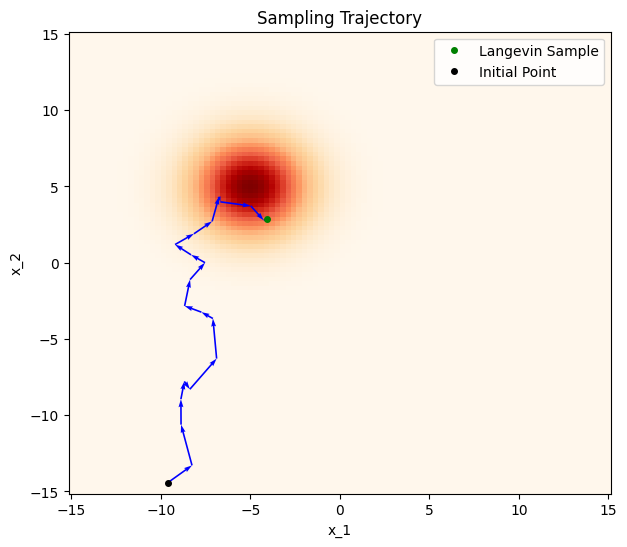

In [39]:
np.random.seed(11)

initial_point = np.random.uniform(-15, 15, size=(1, 2))
final_sample, trajectory = langevin_dynamics(initial_point, mean, cov)

x = np.linspace(-15, 15, 100)
y = np.linspace(-15, 15, 100)
y, x = np.meshgrid(y, x)
z = gaussian_pdf(x, y)
fig, ax = plt.subplots(figsize=(7, 6))
ax.pcolormesh(x, y, z, cmap='OrRd')

step = 50
traj = trajectory[:, 0, :]
for t in range(0, len(traj) - step, step):
    x_start, y_start = traj[t, 0], traj[t, 1]
    x_end, y_end = traj[t + step, 0], traj[t + step, 1]
    ax.quiver(x_start, y_start, (x_end - x_start), (y_end - y_start), 
              color='blue', scale=1, scale_units='xy', angles='xy', width=0.003)

ax.plot(final_sample[0, 0], final_sample[0, 1], marker='o', markersize=4, color='green', linestyle='none', label='Langevin Sample')
ax.plot(initial_point[0, 0], initial_point[0, 1], marker='o', markersize=4, color='black', linestyle='none', label='Initial Point')

ax.set_title("Sampling Trajectory")
ax.set_xlabel("x_1")
ax.set_ylabel("x_2")
ax.legend()
plt.show()

This code generates one trajectory starting from a random point, runs Langevin Dynamics, and plots the path as blue arrows on a Gaussian heatmap. Final sample is marked as green circle which has converged to the distribution’s mean as expected.


## <span style="color: #808080;">Part 4:</span>   
### <span style="color: #8F00FF;">**Comparing Samples from 2 Different Methods Visually**


1000 samples will be generated using **Langevin Dynamics** and 1000 samples using **numpy.random.multivariate_normal** for the 2D Gaussian. We’ll compare them visually with scatter plots on a heatmap to see if they cluster similarly around the mean:

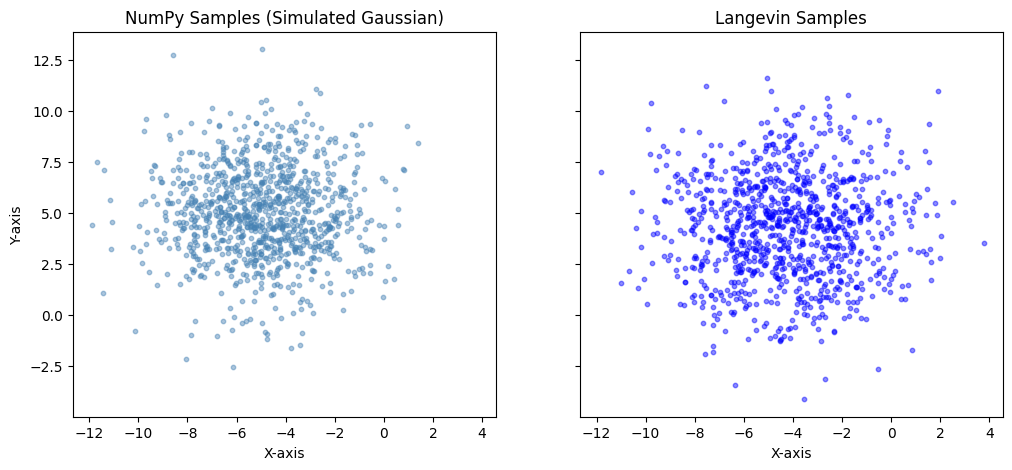

In [40]:
num_samples = 1000
initial_points = np.random.uniform(-15, 15, size=(num_samples, 2))

langevin_samples, _ = langevin_dynamics(initial_points, mean, cov)
numpy_samples = np.random.multivariate_normal(mean, cov, size=num_samples)

_, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5), sharex=True, sharey=True)

ax1.scatter(numpy_samples[:, 0], numpy_samples[:, 1], c='steelblue', alpha=0.45, s=10)
ax1.set_title("NumPy Samples (Simulated Gaussian)")
ax1.set_xlabel("X-axis")
ax1.set_ylabel("Y-axis")

ax2.scatter(langevin_samples[:, 0], langevin_samples[:, 1], c='blue', alpha=0.45, s=10)
ax2.set_title("Langevin Samples")
ax2.set_xlabel("X-axis")

plt.show()

Both NumPy samples (steelblue) and Langevin samples (blue) cluster around [−5,5] with a similar spread, indicating that Langevin Dynamics effectively approximates the true distribution.


## <span style="color: #808080;">Part 5:</span>   
### <span style="color: #8F00FF;">**How Else Can We Compare These Two Methods?**

We can compute the sample mean and covariance for both the Langevin Dynamics and NumPy samples. By comparing these statistics to the true mean [−5, 5] and covariance $\begin{bmatrix} 5 & 0 \\ 0 & 5 \end{bmatrix}$ we can see how well these methods capture the target distribution’s properties.

In [45]:
langevin_mean = np.mean(langevin_samples, axis=0)
langevin_cov = np.cov(langevin_samples.T)
numpy_mean = np.mean(numpy_samples, axis=0)
numpy_cov = np.cov(numpy_samples.T)

print("True Mean:", mean)
print("NumPy Mean:", numpy_mean)
print("Langevin Mean:", langevin_mean)
print("\n\nTrue Covariance:\n", cov)
print("\nNumPy Covariance:\n", numpy_cov)
print("\nLangevin Covariance:\n", langevin_cov)

True Mean: [-5  5]
NumPy Mean: [-4.99059757  4.97725689]
Langevin Mean: [-4.29128833  4.26361516]


True Covariance:
 [[5 0]
 [0 5]]

NumPy Covariance:
 [[ 4.80311693 -0.02644256]
 [-0.02644256  4.89219418]]

Langevin Covariance:
 [[6.27182881 0.07527052]
 [0.07527052 6.41713203]]


Both methods produce samples that closely match the target distribution, with NumPy being slightly more accurate, but Langevin Dynamics is also performing well. It is important to note that The **step size epsilon=0.01** and **num_steps=1000** might not be **optimal** for Langevin Dynamics so the calculated mean and covariance might not be as accurate as is expected.



## <span style="color: #808080;">Bonus:</span>   
### <span style="color: #8F00FF;"> **Can Langevin Dynamics Sample from a Gaussian Mixture?**
Yes, Langevin Dynamics can theoretically sample from a mixture of Gaussians, but in practice, it may struggle to produce proper samples due to the multimodal nature of the distribution.

For a **mixture of Gaussians**, the density is a **weighted sum** of two Gaussians:
$$
p(x) = \alpha \,{N}(x; \mu_1, \Sigma_1) + (1 - \alpha) \,{N}(x; \mu_2, \Sigma_2).
$$
Using the logarithm rule:
$$
\nabla_x \log p(x) = \frac{1}{p(x)} \nabla_x p(x).
$$
Computing the gradient:
$$
\nabla_x p(x) = \alpha S_1(x) \,{N}(x; \mu_1, \Sigma_1) + (1 - \alpha) S_2(x) \,{N}(x; \mu_2, \Sigma_2),
$$
where S_1(x) and S_2(x) are the score functions of each Gaussian component. The score function for the mixture is:
$$
S_\theta(x) = \frac{\alpha S_1(x) \,{N}(x; \mu_1, \Sigma_1) + (1 - \alpha) S_2(x) \,{N}(x; \mu_2, \Sigma_2)}{\alpha \,{N}(x; \mu_1, \Sigma_1) + (1 - \alpha) \,{N}(x; \mu_2, \Sigma_2)}.
$$

* **Capability:** Langevin Dynamics uses the score to guide samples toward high-probability regions. Since the score is well-defined for the mixture (as long as p(x)>0), the algorithm can theoretically sample from p(x) and should converge to the target distribution.  
  
* **Problems:** Langevin Dynamics moves points using the score function. If the density has **multiple peaks** (when the means, μ₁ and μ₂, are sufficiently far apart), it struggles to move between them so it can get stuck in one mode especially if the initial point is close to a mode and the modes are far apart.


In conclusion, while Langevin dynamics can technically be applied to sample from this mixture, its success heavily depends on the parameters (e.g., α, μ₁, μ₂, Σ₁, Σ₂) and the overlap of the modes. For robust and accurate sampling, alternative methods might be preferred



